# Telkom Big Data find Nearest migration DP to ODP

Find the nearest ODP to migrate the DP

In [1]:
import arcpy
from arcpy import env
import time
start = time.time()
#Delete Temp data
arcpy.env.workspace = r'D:\Workaholic\Telkom'
arcpy.Delete_management("xytoline_temp.shp")
# Set local variables
fc_src = r'C:\Users\angga\AppData\Roaming\ESRI\Desktop10.5\ArcCatalog\colo.sde\geoevent.sde.telkom\geoevent.sde.dp'
out_lines = r'D:\Workaholic\Telkom\xytoline_temp'


#XY To Line
arcpy.XYToLine_management(fc_src,out_lines,
                         "dp_long","dp_lat","odp_long",
                         "odp_lat","GEODESIC","n")

#Insert Map Database
fd = r'D:\Workaholic\Telkom\xytoline_temp.shp'
fields2 = ["dp_lat","dp_long","odp_lat","odp_long","n","SHAPE@"]
cursor2 = arcpy.da.SearchCursor(fd, fields2)
fc_dest = r"C:\Users\angga\AppData\Roaming\ESRI\Desktop10.5\ArcCatalog\colo.sde\geoevent.sde.telkom2\geoevent.sde.spider2"
arcpy.TruncateTable_management(fc_dest)
fields = ["dp_lat","dp_long","odp_lat","odp_long","prioritas","SHAPE@"]
cursor = arcpy.da.InsertCursor(fc_dest, fields)
for row in cursor2:
    cursor.insertRow([row[0],row[1],row[2],row[3],row[4],row[5]])
del cursor

#Join Existing Data
#fc_src = r"C:\Users\angga\AppData\Roaming\ESRI\Desktop10.5\ArcCatalog\Connection to localhost (2).sde\dp"
#fc_dest = r"C:\Users\angga\AppData\Roaming\ESRI\Desktop10.5\ArcCatalog\Connection to localhost (2).sde\spider4"
search_feats = {f[0]:f[1] for f in arcpy.da.SearchCursor(fc_src,["OBJECTID","distance","dp_overlay","odp_overla"])}
search_feats2 = {f[0]:f[2] for f in arcpy.da.SearchCursor(fc_src,["OBJECTID","distance","dp_overlay","odp_overla"])}
search_feats3 = {f[0]:f[3] for f in arcpy.da.SearchCursor(fc_src,["OBJECTID","distance","dp_overlay","odp_overla"])}
#print( search_feats[f[0]])
with arcpy.da.UpdateCursor(fc_dest,["objectid_1","distance","dp","odp"]) as upd_cur:
    for upd_row in upd_cur:
        #print(search_feats[upd_row[0]])
        upd_row[1] = search_feats[upd_row[0]]
        upd_row[2] = search_feats2[upd_row[0]]
        upd_row[3] = search_feats3[upd_row[0]]
        upd_cur.updateRow(upd_row)
    del upd_cur
end = time.time()
print(end - start)

692.3633682727814


script will be running 692.3633682727814 in a day every 2 am using sceduler, cause data ODP and DP always update realtime

<Item title:"Telkom Data" type:Web Map owner:admin_esriid>
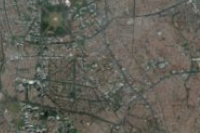

In [15]:
from arcgis.gis import GIS

user_name = 'arcgis_python'
password = 'P@ssword123'
my_gis = GIS('https://demo.esriindonesia.co.id/arcgis/', 'admin_esriid', 'Esri1234') # Connect to ArcGIS Online as an anonymous user
search_subset = my_gis.content.search("Telkom Data", item_type = "Web Map")
subset_item = search_subset[0]
subset_item

show the web map to visualize the result

In [16]:
from arcgis.mapping import WebMap
telkom = WebMap(subset_item)
telkom

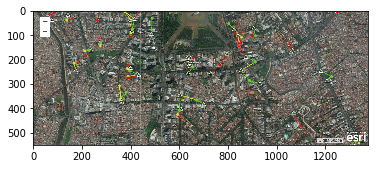

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('tes.png')

# what does it look like?
plt.imshow(img)
plt.show()